$ Accuracy , Confusion \ Matric , Precision , Recall , F1 \ Score $

In [17]:
import numpy as np
import pandas as pd 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score ,\
confusion_matrix , ConfusionMatrixDisplay , precision_score , recall_score , f1_score
from sklearn.datasets import load_iris

In [18]:
# \ in code means rest of the code in this line is written in next line 

In [19]:
df = pd.read_csv('heart_disease.csv')

In [20]:
df.shape

(10000, 21)

In [21]:
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [22]:
df.columns

Index(['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level',
       'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI',
       'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
       'Alcohol Consumption', 'Stress Level', 'Sleep Hours',
       'Sugar Consumption', 'Triglyceride Level', 'Fasting Blood Sugar',
       'CRP Level', 'Homocysteine Level', 'Heart Disease Status'],
      dtype='object')

In [23]:
df = df[['Age' ,'Blood Pressure' , 'Cholesterol Level' ,'BMI' , 
           'Sleep Hours' ,'Triglyceride Level' , 'Homocysteine Level' ,'Heart Disease Status']]

In [24]:
df.head()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Homocysteine Level,Heart Disease Status
0,56.0,153.0,155.0,24.991591,7.633228,342.0,12.387250,No
1,69.0,146.0,286.0,25.221799,8.744034,133.0,19.298875,No
2,46.0,126.0,216.0,29.855447,4.440440,393.0,11.230926,No
3,32.0,122.0,293.0,24.130477,5.249405,293.0,5.961958,No
4,60.0,166.0,242.0,20.486289,7.030971,263.0,8.153887,No


In [25]:
df = df.dropna()

In [26]:
df['Heart Disease Status'].value_counts()

Heart Disease Status
No     7858
Yes    1971
Name: count, dtype: int64

In [27]:
X = df.drop(columns='Heart Disease Status')
y = df['Heart Disease Status']

In [28]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
y_encoded = label.fit_transform(y)
print(label.classes_)
print(y_encoded[0])          # [0 --> No , 1 --> Yes]

['No' 'Yes']
0


In [29]:
X_train , X_test , y_train , y_test = train_test_split(X , y_encoded , test_size=0.2 , random_state=42)

In [30]:
X_train.shape , X_test.shape

((7863, 7), (1966, 7))

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
lor = LogisticRegression()
lor.fit(X_train_scaled,y_train)
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled , y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [33]:
y_pred1 = lor.predict(X_test_scaled)
y_pred2 = dt.predict(X_test_scaled)

In [34]:
print("Logistic Regression accuracy:" , accuracy_score(y_test , y_pred1))
print("Decision Tree accuracy :" , accuracy_score(y_test , y_pred2))

Logistic Regression accuracy: 0.8021363173957273
Decision Tree accuracy : 0.6602238046795524


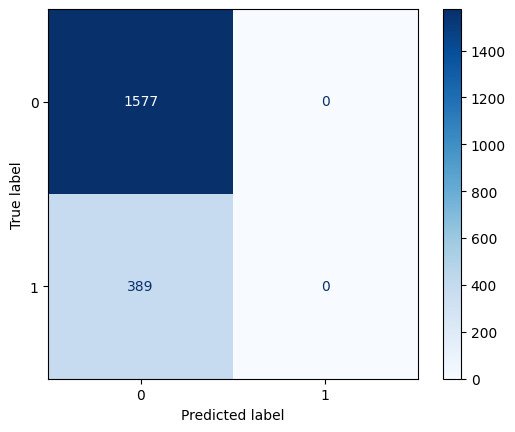

In [36]:
#print("confusion matrix of Logistic Regression model:\n" ,confusion_matrix(y_test , y_pred1))
cm =  confusion_matrix(y_test, y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues")

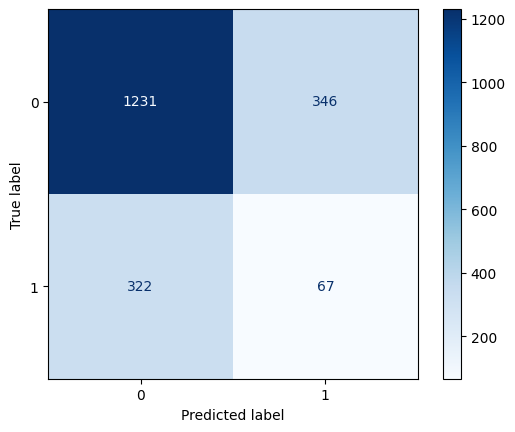

In [37]:
# print("confusion matrix of Decision Tree model:\n" ,confusion_matrix(y_test , y_pred2))
cm =  confusion_matrix(y_test, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues")

In [56]:
#Accuracy of Logistic Regression is more but it is not a good model , because it is 
# Poorly performing on label1 (Heart Desease --> yes)
# Decision tree has less accuracy but it is performing better on the instances where true lebel=1

In [ ]:
# Now Precision , Recall , and F1 Score 
# Precison is the portion predicted truly  by model in each class , i.e column wise 
# P1 = TP/(TP+TN) or P0=TN/(TN+FN)
# Here P1 and P0 are precision for class 1  and 0 
# P --> Precsion , TP = True Positive , TN = true Negative , FP=False positive 
# FN = False Negative , from above figure , TP=67 (Label 1) , TN =1231 (Lable 0)
# FP = 346 , FN = 322
# Recall is Portion of True prediction in each class row wise 
# R1 = TP/(TP+FN) , R0 = TN(TN+FP)  here we are seeing the ground reality 
# Generely in class if (y_test , y_pred ,average='None' ) , 
# then it will give precision , recall of each class
# if we do not pass anything in class then by default it will give the precision , recall , for 
# class 1 , beacuse it assume that class 1 is positive class and 0 is the negative class


In [ ]:
# F1_score = 2*P*R/(P+R) , we can calculate for each class 
# F1 score will be biased towards min(P , R)

In [41]:
print("Precision of Logistic Regression Model:" , precision_score(y_test , y_pred1))
print("precision of DT model:" , precision_score(y_test , y_pred2))

print("Recall of Logistic Regression Model:" , recall_score(y_test , y_pred1))
print("Recall of Logistic DT Model:" , recall_score(y_test , y_pred2))

print("F1 Score of Logistic Regression Model:" , f1_score(y_test , y_pred1))
print("F1 Score of Logistic DT Model:" , f1_score(y_test , y_pred2))


Precision of Logistic Regression Model: 0.0
precision of DT model: 0.162227602905569
Recall of Logistic Regression Model: 0.0
Recall of Logistic DT Model: 0.17223650385604114
F1 Score of Logistic Regression Model: 0.0
F1 Score of Logistic DT Model: 0.16708229426433915


c:\Users\Jayhind\Desktop\MachineLearning\myenv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [42]:
# By Default it is giving one value , that is for class 1
# Now lets calculate for each class 

print("Precision of Logistic Regression Model:" , precision_score(y_test , y_pred1 , average=None))
print("precision of DT model:" , precision_score(y_test , y_pred2 , average=None))

print("Recall of Logistic Regression Model:" , recall_score(y_test , y_pred1 , average=None))
print("Recall of Logistic DT Model:" , recall_score(y_test , y_pred2 ,average=None))

print("F1 Score of Logistic Regression Model:" , f1_score(y_test , y_pred1 , average=None))
print("F1 Score of Logistic DT Model:" , f1_score(y_test , y_pred2 , average=None))

Precision of Logistic Regression Model: [0.80213632 0.        ]
precision of DT model: [0.79265937 0.1622276 ]
Recall of Logistic Regression Model: [1. 0.]
Recall of Logistic DT Model: [0.78059607 0.1722365 ]
F1 Score of Logistic Regression Model: [0.89020604 0.        ]
F1 Score of Logistic DT Model: [0.78658147 0.16708229]


c:\Users\Jayhind\Desktop\MachineLearning\myenv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [ ]:
# We can pass average = 'weight' or 'micro' 
# weight means it will calculate weighted avg of precsion , recall , f1 score 
# and weight will be calculated on the basis of no of each class appeared in test data
# micro , means just simple avg 


In [43]:
print("Precision of Logistic Regression Model:" , precision_score(y_test , y_pred1 , average="weighted"))
print("precision of DT model:" , precision_score(y_test , y_pred2 , average="micro"))

print("Recall of Logistic Regression Model:" , recall_score(y_test , y_pred1 , average="micro"))
print("Recall of Logistic DT Model:" , recall_score(y_test , y_pred2 ,average="weighted"))

print("F1 Score of Logistic Regression Model:" , f1_score(y_test , y_pred1 , average='macro'))
print("F1 Score of Logistic DT Model:" , f1_score(y_test , y_pred2 , average='weighted'))

Precision of Logistic Regression Model: 0.6434226716851791
precision of DT model: 0.6602238046795524
Recall of Logistic Regression Model: 0.8021363173957273
Recall of Logistic DT Model: 0.6602238046795524
F1 Score of Logistic Regression Model: 0.4451030200395145
F1 Score of Logistic DT Model: 0.6640050814367298


c:\Users\Jayhind\Desktop\MachineLearning\myenv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [66]:
data = load_iris()

In [67]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [68]:
X = data['data']
y = data['target']
feature_name = data['feature_names']
target_names = data['target_names']

In [69]:
df2 = pd.DataFrame( X , columns=feature_name)
df2['target'] = y   # ['setosa', 'versicolor', 'virginica'] = [0 ,1 ,2]

In [70]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [71]:
df2.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [72]:
X_train , X_test , y_train , y_test = train_test_split(X , y , random_state=42 , test_size=0.2)
X_train.shape , X_test.shape

((120, 4), (30, 4))

In [73]:
clf1 = LogisticRegression()  
# here in muli_class classification we can pass multi_class ='multinomial' in LogisticRegression()
# other wise by default internly it will switch to multi class classification for more than
# 2 unique class , if 2 class is there then binary classification and sigmoid is the function
# for multiclass classification softmax is the function
clf2 = DecisionTreeClassifier()

In [74]:
clf1.fit(X_train , y_train)
clf2.fit(X_train , y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [75]:
y_pred3 = clf1.predict(X_test)
y_pred4 = clf2.predict(X_test)


In [76]:
print("Logistic Regression accuracy:" , accuracy_score(y_test , y_pred3))
print("Decision Tree accuracy :" , accuracy_score(y_test , y_pred4))

Logistic Regression accuracy: 1.0
Decision Tree accuracy : 1.0


In [77]:
print("Confusion Matrix LOG R:\n" , confusion_matrix(y_test , y_pred3))

Confusion Matrix LOG R:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Confusion Matrix of Logistic Regresion Model


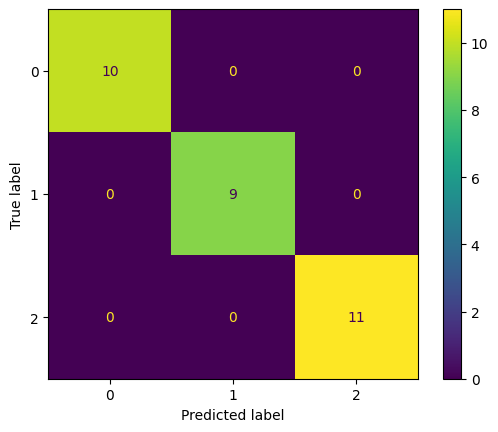

In [78]:
print("Confusion Matrix of Logistic Regresion Model")
cm = confusion_matrix(y_test , y_pred3)
dsp = ConfusionMatrixDisplay(confusion_matrix=cm , display_labels=[0,1,2])
dsp.plot()

Confusion Matrix of Decision Tree Model


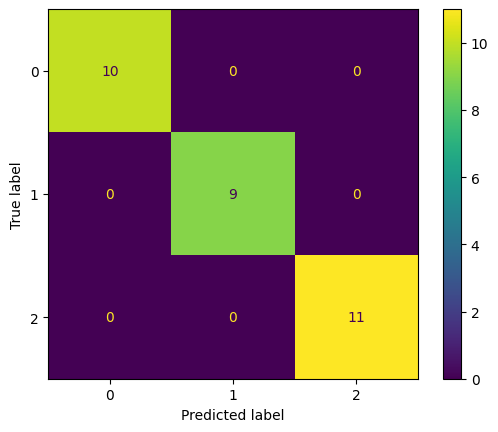

In [79]:
print("Confusion Matrix of Decision Tree Model")
cm = confusion_matrix(y_test , y_pred4)
dsp = ConfusionMatrixDisplay(confusion_matrix=cm , display_labels=[0,1,2])
dsp.plot()

In [80]:
# Both of the model is having good accuracy and both of the model is making 0
# error on missclassification

In [81]:
# Now lets calculate Precison , Recall , and F1 score 
print("Precison Logistic Regression" ,precision_score(y_test , y_pred3 , average=None))
print("Precison DT " ,precision_score(y_test , y_pred4 , average=None))

print("Recall Logistic Regression" ,recall_score(y_test , y_pred3 , average=None))
print("Recall DT" ,recall_score(y_test , y_pred4 , average=None))

print("F1 score Logistic Regression" ,f1_score(y_test , y_pred3 , average=None))
print("F1 Score  DT " ,f1_score(y_test , y_pred4 , average=None))

Precison Logistic Regression [1. 1. 1.]
Precison DT  [1. 1. 1.]
Recall Logistic Regression [1. 1. 1.]
Recall DT [1. 1. 1.]
F1 score Logistic Regression [1. 1. 1.]
F1 Score  DT  [1. 1. 1.]


In [82]:
# Lets calculate weighted 
print("Precison Logistic Regression" ,precision_score(y_test , y_pred3 , average="weighted"))
print("Precison DT " ,precision_score(y_test , y_pred4 , average="weighted"))

print("Recall Logistic Regression" ,recall_score(y_test , y_pred3 , average="weighted"))
print("Recall DT" ,recall_score(y_test , y_pred4 , average="weighted"))

print("F1 score Logistic Regression" ,f1_score(y_test , y_pred3 , average="weighted"))
print("F1 Score  DT " ,f1_score(y_test , y_pred4 , average="weighted"))

Precison Logistic Regression 1.0
Precison DT  1.0
Recall Logistic Regression 1.0
Recall DT 1.0
F1 score Logistic Regression 1.0
F1 Score  DT  1.0


In [83]:
# We can calculate everything in one table 
from sklearn.metrics import classification_report
print("Classification Report for Logistic Regression \n" , classification_report(y_test , y_pred3))

Classification Report for Logistic Regression 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [84]:
# Here support is the no of instance of that class is present in test data 
# and total test data was 30 
# micro avg and weighted avg of precision , recall and f1 score is also there 

In [85]:
# We can calculate everything in one table 
from sklearn.metrics import classification_report
print("Classification Report for DT \n" , classification_report(y_test , y_pred4))

Classification Report for DT 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



MultiNomial Class classification

In [93]:
new_df = df2[['sepal length (cm)' , 'petal length (cm)' , 'target']]

In [94]:
new_df.head()

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [95]:
x_train_new , x_test_new , y_train_new , y_test_new = train_test_split(
    new_df[['sepal length (cm)' , 'petal length (cm)']] , new_df['target'] , random_state=40 ,
    test_size=0.2)

In [96]:
clf = LogisticRegression(multi_class='multinomial')
clf.fit(x_train_new , y_train_new)

c:\Users\Jayhind\Desktop\MachineLearning\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'multinomial'


In [97]:
y_pred5 = clf.predict(x_test_new)


In [98]:
print("Accuracy :" , accuracy_score(y_test_new , y_pred5))

Accuracy : 0.9666666666666667


In [99]:
print("classification_report:\n" , classification_report(y_test_new , y_pred5))

classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.92      1.00      0.96        12
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



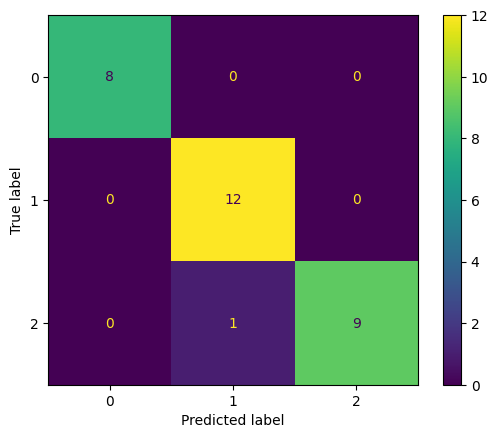

In [102]:
cm2 = confusion_matrix(y_test_new , y_pred5)
disp = ConfusionMatrixDisplay(cm2 , display_labels=[0,1,2])
disp.plot()

c:\Users\Jayhind\Desktop\MachineLearning\myenv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


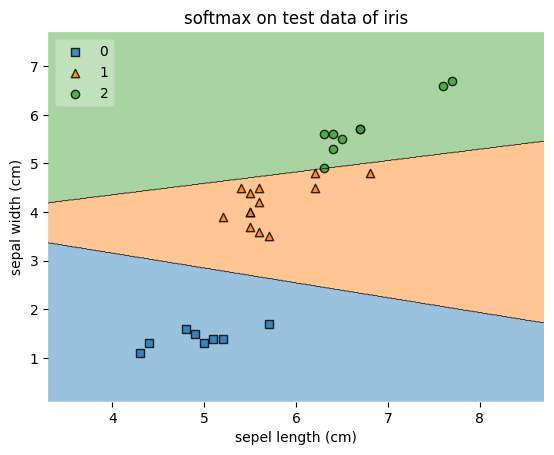

In [104]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
plot_decision_regions(x_test_new.values , y_pred5 , clf , legend=2  )

plt.xlabel("sepel length (cm)")
plt.ylabel("sepal width (cm)")
plt.title("softmax on test data of iris")
plt.show()


In [105]:
# For data which is not linearly seperable we use polynomial logistic regression
# first transform the data x --> x^0 , x^1 , x^2 .... 
# then apply logistic regression then boundary will be chnaged from linear line to curve
# but if there is very high non linearity in data then we switch other algorithm like 
# DT , Random Forest , Naive Bays  , SVM 